In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [8]:
import dataloaders
import models
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics 
import sklearn.cluster as cluster
import numpy as np 
import random
import classifiers
from torch.autograd import Variable
import torch
import torch.nn as nn 
import torch.optim as optim
import util
from pathlib import Path
import time

from imblearn.under_sampling import RandomUnderSampler

In [31]:
filename = 'Wiki-Rfa'
datapath = f'../data/{filename}-cleaned.csv'
delimiter = ' '
data = dataloaders.UnsplitDataset(datapath, ratio=0.8, delimiter=delimiter)

In [32]:
# parameters for PsuedoKernel 
num_nodes = data.get_num_nodes()
dims = 16
epochs = 50
lr = 0.15
lr_decay=0.0
weight_decay=0.0
lam = 0.00055
p = 2

delta = 1
delta0 = 0.5
dims_array = [dims, 20, 20]
frac1 = 0.5
frac0 = 0.5
p0 = True if frac0 > 0 else 0

X, y = data.get_shuffled_data()

In [33]:
t1 = time.time()
kernel_model = models.fit_pseudo_kernel_model(num_nodes, dims, X, y, epochs=epochs, p=p, 
                                              lr=lr,lr_decay=lr_decay, lam=lam, weight_decay=weight_decay, 
                                                  undersample=True)
t2 = time.time()
print(t2 - t1)

The loss at epoch  1  was  0.693988025188446
The loss at epoch  2  was  0.7224938273429871
The loss at epoch  3  was  0.6969404816627502
The loss at epoch  4  was  0.6847659349441528
The loss at epoch  5  was  0.6473589539527893
The loss at epoch  6  was  0.6326271295547485
The loss at epoch  7  was  0.6049489974975586
The loss at epoch  8  was  0.5844305157661438
The loss at epoch  9  was  0.566598117351532
The loss at epoch  10  was  0.5514394640922546
The loss at epoch  11  was  0.543750524520874
The loss at epoch  12  was  0.5409927368164062
The loss at epoch  13  was  0.5672416090965271
The loss at epoch  14  was  0.5507136583328247
The loss at epoch  15  was  0.5301263332366943
The loss at epoch  16  was  0.5219999551773071
The loss at epoch  17  was  0.5202190279960632
The loss at epoch  18  was  0.5143694877624512
The loss at epoch  19  was  0.5142116546630859
The loss at epoch  20  was  0.5122462511062622
The loss at epoch  21  was  0.5117899179458618
The loss at epoch  22  wa

In [34]:
triples, triples0 = util.triples_from_array(X, y)
print('Triples created!')
batch_size = int(frac1 * len(triples))
batch_size0 = int(frac0 * len(triples0))
t1 = time.time()
sine_model = models.fit_sine_model(num_nodes, dims_array, triples, triples0, delta, delta0,batch_size, batch_size0, epochs, lr=lr, lr_decay=lr_decay,lam=lam, p=p, p0=p0)
t2 = time.time()
print(t2 - t1)

Triples created!
Loss at epoch  1  is  1.0059492588043213
Loss at epoch  2  is  0.9658286571502686
Loss at epoch  3  is  0.29036033153533936
Loss at epoch  4  is  0.6551297307014465
Loss at epoch  5  is  0.5936199426651001
Loss at epoch  6  is  0.29979950189590454
Loss at epoch  7  is  0.2932747006416321
Loss at epoch  8  is  0.28561848402023315
Loss at epoch  9  is  0.28271761536598206
Loss at epoch  10  is  0.277517169713974
Loss at epoch  11  is  0.2726942002773285
Loss at epoch  12  is  0.27181264758110046
Loss at epoch  13  is  0.26727691292762756
Loss at epoch  14  is  0.2561963200569153
Loss at epoch  15  is  0.24807380139827728
Loss at epoch  16  is  0.2422603815793991
Loss at epoch  17  is  0.2324962019920349
Loss at epoch  18  is  0.23852670192718506
Loss at epoch  19  is  0.2474517524242401
Loss at epoch  20  is  0.23370787501335144
Loss at epoch  21  is  0.2410617619752884
Loss at epoch  22  is  0.22997604310512543
Loss at epoch  23  is  0.22027844190597534
Loss at epoch  2

In [37]:
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")
from pylab import rcParams
rcParams['figure.figsize'] = 13, 13
rcParams['axes.titlesize'] = 14

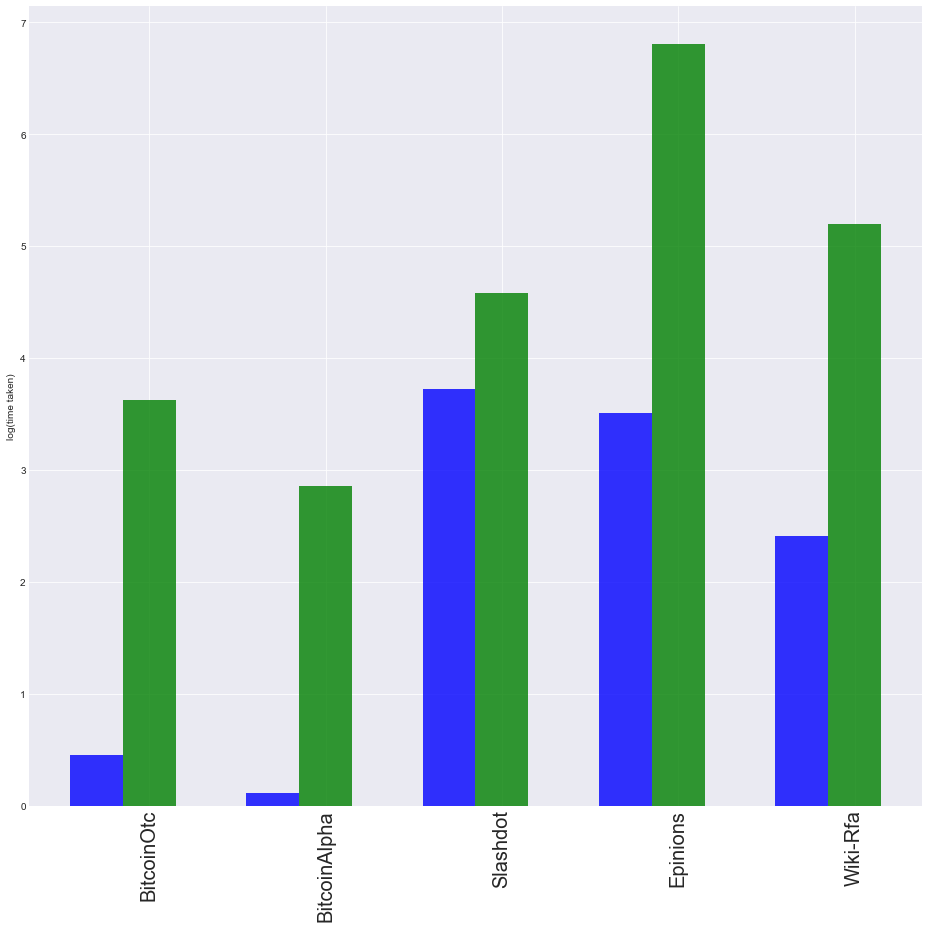

In [52]:
# data to plot
n_groups = 5
means_frank = np.log([1.57, 1.12, 41.47, 33.27, 11.11])
means_guido = np.log([37.43, 17.41, 97.92, 899.59, 181.08])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='StEM')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SiNE')
 
#plt.xlabel('Method')
plt.ylabel('log(time taken)')
#plt.title('')
plt.xticks(index + bar_width, ('BitcoinOtc', 'BitcoinAlpha',  'Slashdot', 'Epinions', 'Wiki-Rfa'), fontsize=20, rotation=90)

font_dict = fontdict={'fontsize': 12,
 'fontweight' : rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}

#ax.legend(prop={'size': font_dict['fontsize']})
ax.grid(True)


 
plt.tight_layout()
plt.show()
fig.savefig('Time Chart.png')

In [53]:
arr = [12.6, 7.5, 11.2, 15.4, 82.6, 24.6]
print(np.mean(arr))
print(np.std(arr))

25.65
26.0063934447


In [54]:
arr = [15.9, 8.1, 11.5, 15.9, 86.9, 35.1]
print(np.mean(arr))
print(np.std(arr))

28.9
27.3125123951


In [55]:
arr = [12.6, 7.5, 11.2, 15.4, 24.6]
print(np.mean(arr))
print(np.std(arr))

14.26
5.7624994577


In [56]:
arr = [15.9, 8.1, 11.5, 15.9,  35.1]
print(np.mean(arr))
print(np.std(arr))

17.3
9.37059229718
